In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [147]:
import warnings
warnings.filterwarnings('ignore')

In [148]:
pd.set_option('display.max_rows',None)
pd.set_option('max_columns', None)

In [149]:
# Loading the dataset 
app_data = pd.read_csv('application_data.csv')

In [150]:
# Shape of the dataset

print('Application data shape: ', app_data.shape)
app_data.head()

Application data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,351000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.000000,-2120,nan,1,1,0,1,1,0,Laborers,1.000000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.024700,0.036900,0.972200,0.619200,0.014300,0.000000,0.069000,0.083300,0.125000,0.036900,0.020200,0.019000,0.000000,0.000000,0.025200,0.038300,0.972200,0.634100,0.014400,0.000000,0.069000,0.083300,0.125000,0.037700,0.022000,0.019800,0.000000,0.000000,0.025000,0.036900,0.972200,0.624300,0.014400,0.000000,0.069000,0.083300,0.125000,0.037500,0.020500,0.019300,0.000000,0.000000,reg oper account,block of flats,0.014900,"Stone, brick",No,2.000000,2.000000,2.000000,2.000000,-1134.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.000000,-291,nan,1,1,0,1,1,0,Core staff,2.000000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,nan,0.095900,0.052900,0.985100,0.796000,0.060500,0.080000,0.034500,0.291700,0.333300,0.013000,0.077300,0.054900,0.003900,0.009800,0.092400,0.053800,0.985100,0.804000,0.049700,0.080600,0.034500,0.291700,0.333300,0.012800,0.079000,0.055400,0.000000,0.000000,0.096800,0.052900,0.985100,0.798700,0.060800,0.080000,0.034500,0.291700,0.333300,0.013200,0.078700,0.055800,0.003900,0.010000,reg oper account,block of flats,0.071400,Block,No,1.000000,0.000000,1.000000,0.000000,-828.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,675

### FINDING NULLS

In [151]:
# Determing the columns with null values and the percentage of null values


def null_values_table(df):
        # NULL Values
        null_values = df.isnull().sum()
        
        # Percentage of NULL values
        null_percent = 100 * df.isnull().sum() / len(df)
        
        # Table of the results
        null_table = pd.concat([null_values, null_percent], axis=1)
        
        # Rename the columns
        null_table_columns = null_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sorting the table in descending % value of nulls
        null_table_columns = null_table_columns[
            null_table_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(2)
        
        # Summary Info
        print ("The dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(null_table_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return null_table_columns

In [152]:
null_values = null_values_table(app_data)
null_values

The dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.870000
COMMONAREA_AVG,214865,69.870000
COMMONAREA_MODE,214865,69.870000
NONLIVINGAPARTMENTS_MEDI,213514,69.430000
NONLIVINGAPARTMENTS_MODE,213514,69.430000
NONLIVINGAPARTMENTS_AVG,213514,69.430000
FONDKAPREMONT_MODE,210295,68.390000
LIVINGAPARTMENTS_MODE,210199,68.350000
LIVINGAPARTMENTS_MEDI,210199,68.350000
LIVINGAPARTMENTS_AVG,210199,68.350000


## DROPPING NULLS

In [153]:
# Column list which have 50 percent and more of null values

drop_cols = list((null_values[(null_values['% of Total Values'].values >= 50) == True]).index)

print('We will be dropping {} columns as they constitute more than 50% of null values'.format(len(drop_cols)))

We will be dropping 41 columns as they constitute more than 50% of null values


In [154]:
#Dropping the columns

app_data.drop(labels=drop_cols, axis =1, inplace = True)

In [155]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

### Manually deleting columns

In [156]:
del_cols = ['REGION_POPULATION_RELATIVE','DAYS_REGISTRATION','DAYS_ID_PUBLISH','FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL',  'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR']

In [157]:
# Dropping columns 

app_data.drop(labels= del_cols, axis=1, inplace =True )

In [158]:
app_data.shape
print('The database now have', app_data.shape[0],'rows and', app_data.shape[1], 'columns')

The database now have 307511 rows and 25 columns


In [159]:
app_data.isnull().sum()/ len(app_data) * 100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
OCCUPATION_TYPE               31.345545
CNT_FAM_MEMBERS                0.000650
REGION_RATING_CLIENT           0.000000
REGION_RATING_CLIENT_W_CITY    0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
ORGANIZATION_TYPE              0.000000
DAYS_LAST_PHONE_CHANGE         0.000325


## Inferences

##### 1) AMT_ANNUITY : There is a very small percentage of null values in the column. We can impute these values by the mean of the values in this column. 
##### 2) AMT_GOODS_PRICE : We can see in the table below that the data is skewed to right which hints at this data having outliers. So for this column, we could impute the missing values with the median.
##### 3) OCCUPATION_TYPE : It corresponds to 30 percent of missing values. As it is a categorical variable, we can impute the missing values with the mode.
##### 4) CNT_FAM_MEMBERS: As this is a categorical variable, we are going to impute the missing values with mode.
##### 5) DAYS_LAST_PHONE_CHANGE: We can see in the table below that the data is slightly skewed to the left. We can impute the missing values with the median and then convert it into a int type to impute them

In [160]:
## AMT_GOODS_PRICE
pd.set_option('float_format', '{:f}'.format)

app_data.AMT_GOODS_PRICE.describe()

count    307233.000000
mean     538396.207429
std      369446.460540
min       40500.000000
25%      238500.000000
50%      450000.000000
75%      679500.000000
max     4050000.000000
Name: AMT_GOODS_PRICE, dtype: float64

In [161]:
# DAYS_LAST_PHONE_CHANGE
app_data.DAYS_LAST_PHONE_CHANGE.describe()

count   307510.000000
mean      -962.858788
std        826.808487
min      -4292.000000
25%      -1570.000000
50%       -757.000000
75%       -274.000000
max          0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

### Checking Data Type

In [162]:
app_data.dtypes.value_counts()


object     12
int64       7
float64     6
dtype: int64

In [163]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 25 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_TYPE_SUITE                306219 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
DAYS_BIRTH              

In [164]:
## As count of children cannot be a float value, we will convert it into integer type

app_data['CNT_CHILDREN'] = app_data['CNT_CHILDREN'].astype('int')

In [165]:
app_data.CNT_CHILDREN.dtype


dtype('int64')

## Binning Numerical Columns into Categorical Groups

In [166]:
pd.set_option('float_format', '{:f}'.format)


In [168]:
# Descriptive Analysis - Income
app_data.AMT_INCOME_TOTAL.describe()

count      307511.000000
mean       168797.919297
std        237123.146279
min         25650.000000
25%        112500.000000
50%        147150.000000
75%        202500.000000
max     117000000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

#### We can see that the data is  skewed to the right which indicates outliers and the maximum value clearly is an outlier.

In [169]:
## Binning - AMT_INCOME_TOTAL

app_data.loc[:,'Income_Total']=pd.qcut(app_data.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.20,0.50,0.90,1],
labels=['Low','Medium','High','Very high'])

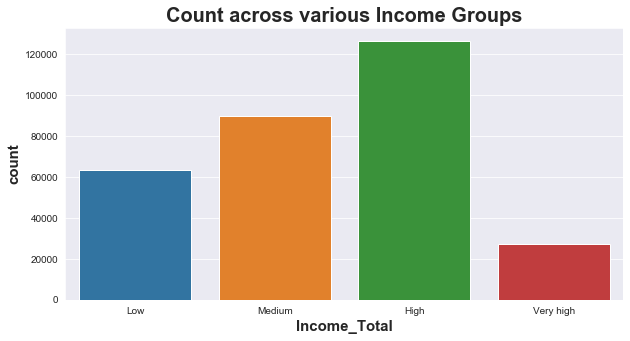

In [170]:
### PLOT 

sns.set_style(style="darkgrid")
plt.figure(figsize= [10,5])
plt.title('Count across various Income Groups',fontdict={'fontsize':20,'fontweight':'heavy'})
plt.xlabel('Income Groups',fontdict={'fontsize':15,'fontweight':'heavy'})
plt.ylabel('Count',fontdict={'fontsize':15,'fontweight':'heavy'})
sns.countplot( x= 'Income_Total' ,hue=None, data=app_data )
plt.show()

#### The loan application have been submitted mainly by people in the High income bracket followed the Medium income bracket

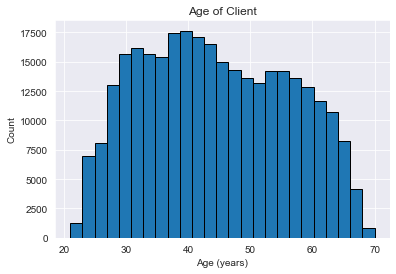

In [172]:
plt.hist(abs(app_data['DAYS_BIRTH'] // 365), edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

##### We see the peak of the data in the age group between 35-45

In [174]:
# Descriptive Analysis - Age 

app_data.DAYS_BIRTH.describe()

count   307511.000000
mean    -16036.995067
std       4363.988632
min     -25229.000000
25%     -19682.000000
50%     -15750.000000
75%     -12413.000000
max      -7489.000000
Name: DAYS_BIRTH, dtype: float64

#### The data doesn't seem to be skewed. We will convert the days into years for better analysis

In [175]:
app_data['Age'] = app_data.DAYS_BIRTH//-365

In [176]:
app_data.drop(['DAYS_BIRTH'],axis=1,inplace = True)

In [177]:
app_data.Age.describe()

count   307511.000000
mean        43.435968
std         11.954593
min         20.000000
25%         34.000000
50%         43.000000
75%         53.000000
max         69.000000
Name: Age, dtype: float64

In [178]:
## Binning 
app_data['Age_Group'] = pd.cut(app_data.Age,bins=np.linspace(start = 20 ,stop=70,num=11))

In [180]:
app_data.Age_Group.value_counts(normalize=True)*100

(35.0, 40.0]   14.204416
(40.0, 45.0]   13.006731
(30.0, 35.0]   12.824624
(25.0, 30.0]   11.865630
(50.0, 55.0]   11.413287
(45.0, 50.0]   11.187929
(55.0, 60.0]   10.640955
(60.0, 65.0]    7.921368
(20.0, 25.0]    5.306169
(65.0, 70.0]    1.628890
Name: Age_Group, dtype: float64

#### This conforms with what we saw in the histogram above that majority of the data lies between 35-45

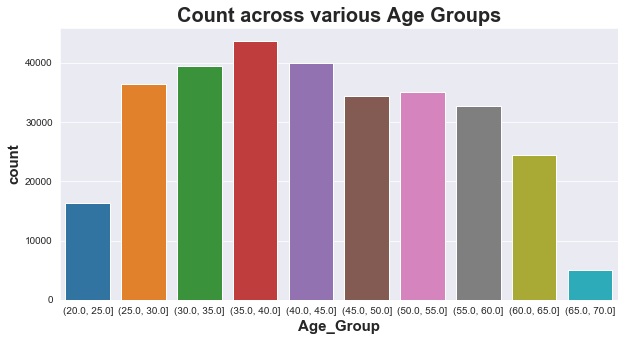

In [182]:
### PLOT
sns.set_style(style="darkgrid")
plt.figure(figsize= [10,5])
plt.title('Count across various Age Groups',fontdict={'fontsize':20,'fontweight':'heavy'})
plt.xlabel('Age Groups',fontdict={'fontsize':15,'fontweight':'heavy'})
plt.ylabel('Count',fontdict={'fontsize':15,'fontweight':'heavy'})
sns.countplot( x= 'Age_Group' ,hue=None, data=app_data )
plt.show()

## Outliers 

In [183]:
pd.set_option('float_format', '{:f}'.format)
app_data.describe()



,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,DAYS_LAST_PHONE_CHANGE,Age
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307499.000000,307233.000000,307511.000000,307509.000000,307511.000000,307511.000000,307510.000000,307511.000000
mean,278180.518577,0.080729,0.417052,168797.919297,599025.999706,27108.573909,538396.207429,63815.045904,2.152665,2.052463,2.031521,-962.858788,43.435968
std,102790.175348,0.272419,0.722121,237123.146279,402490.776996,14493.737315,369446.460540,141275.766519,0.910682,0.509034,0.502737,826.808487,11.954593
min,100002.000000,0.000000,0.000000,25650.000000,45000.000000,1615.500000,40500.000000,-17912.000000,1.000000,1.000000,1.000000,-4292.000000,20.000000
25%,189145.500000,0.000000,0.000000,112500.000000,270000.000000,16524.000000,238500.000000,-2760.000000,2.000000,2.000000,2.000000,-1570.000000,34.000000
50%,278202.000000,0.000000,0.000000,147150.000000,513531.000000,24903.000000,450000.000000,-1213.000000,2.000000,2.000000,2.000000,-757.000000,43.000000
75%,367142.500000,0.000000,1.000000,202500.000000,808650.000000,34596.000000,679500.000000,-289.000000,3.000000,2.000000,2.000000,-274.000000,53.000000
max,456255.000000,1.000000,19.000000,117000000.000000,4050000.000000,258025.500000,4050000.000000,365243.000000,20.000000,3.000000,3.000000,0.000000,69.000000


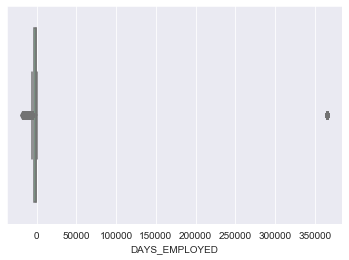

0.500000    -1213.000000
0.750000     -289.000000
0.950000   365243.000000
Name: DAYS_EMPLOYED, dtype: float64


In [184]:
# DAYS_EMPLOYED

sns.boxplot(data=app_data, x = 'DAYS_EMPLOYED', palette='rainbow',orient='h')
plt.show()
print(app_data.DAYS_EMPLOYED.quantile([0.5,0.75,0.95]))

#### 365423 is an incorrect value which when converted is equal to 1000 years.We need to delete this row. 


In [185]:
app_data['YEARS_EMPLOYED'] = abs(app_data.DAYS_EMPLOYED//365)

In [186]:
app_data['YEARS_EMPLOYED'].describe()

count   307511.000000
mean       185.839472
std        381.588910
min          0.000000
25%          3.000000
50%          7.000000
75%         16.000000
max       1000.000000
Name: YEARS_EMPLOYED, dtype: float64

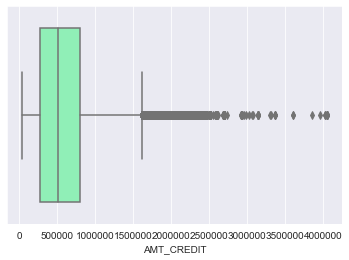

In [187]:
## AMT_CREDIT Outliers 
sns.boxplot(data=app_data, x = 'AMT_CREDIT', palette='rainbow',orient='h')
plt.show()

In [188]:
## Quantiles
app_data['AMT_CREDIT'].quantile([0.75,0.85,0.95,0.99])

0.750000    808650.000000
0.850000   1024740.000000
0.950000   1350000.000000
0.990000   1854000.000000
Name: AMT_CREDIT, dtype: float64

#### We can see that there is no extreme outlier here and the credit amount are continuously increasing with a slow pace and we should not delete these values

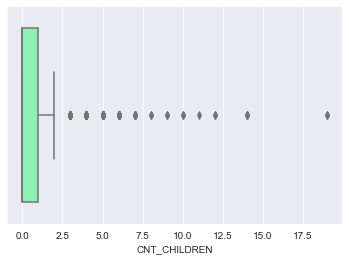

In [189]:
# CNT_CHILDREN Outliers
sns.boxplot(data=app_data, x = 'CNT_CHILDREN', palette='rainbow',orient='h')
plt.show()

In [190]:
app_data['CNT_CHILDREN'].quantile([0.95,0.99])

0.950000   2.000000
0.990000   3.000000
Name: CNT_CHILDREN, dtype: float64

#### 99th percentile of people have 3children. Whereas the maximum value shows 19 children which seems like a human error. It can either be removed completely or it can capped to a reasonable number


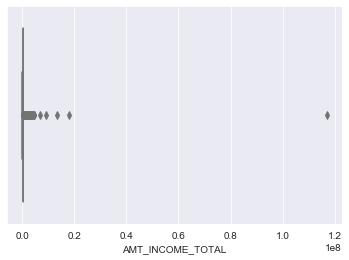

In [191]:
# AMT_INCOME_TOTAL Ouliers
sns.boxplot(data=app_data, x = 'AMT_INCOME_TOTAL', palette='rainbow',orient='h')

In [192]:
app_data['AMT_INCOME_TOTAL'].quantile([0.95,0.99])

0.950000   337500.000000
0.990000   472500.000000
Name: AMT_INCOME_TOTAL, dtype: float64

#### The maximum amount is way above the 99th percentile and we will have to delete the extreme outliers as it might affect our analysis.


## Target EDA

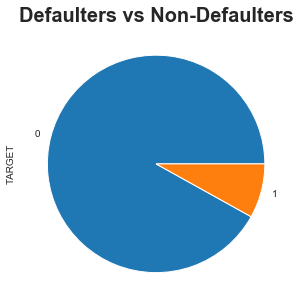

In [193]:

plt.figure(figsize= [10,5])
plt.title('Defaulters vs Non-Defaulters',fontdict={'fontsize':20,'fontweight':'heavy'})
app_data.TARGET.value_counts(normalize=True).plot('pie')
plt.show()

In [194]:
target_0 =app_data[app_data.TARGET==0]
target_1=app_data[app_data.TARGET==1]

In [195]:
defaulter_percent=(len(target_1)*100)/len(app_data)
non_defaulter_percent=(len(target_0)*100)/len(app_data)

print("The % of people who have paid their loan is:",round(non_defaulter_percent,2),"%")
print("The % of people who haven't paid their loan is:",round(defaulter_percent,2),"%")
print("The data imbalance ratio is:",round(len(target_0)/len(target_1),2))

The % of people who have paid their loan is: 91.93 %
The % of people who haven't paid their loan is: 8.07 %
The data imbalance ratio is: 11.39


## Univariate Analysis

## Target and Contract Type

In [196]:
print("The contract type chosen by non-defaulters are:\n",  target_0.NAME_CONTRACT_TYPE.value_counts(normalize=True))
print()
print()
print("The contract type chosen by defaulters are:\n", target_1.NAME_CONTRACT_TYPE.value_counts(normalize=True))

The contract type chosen by non-defaulters are:
 Cash loans        0.902100
Revolving loans   0.097900
Name: NAME_CONTRACT_TYPE, dtype: float64


The contract type chosen by defaulters are:
 Cash loans        0.935388
Revolving loans   0.064612
Name: NAME_CONTRACT_TYPE, dtype: float64


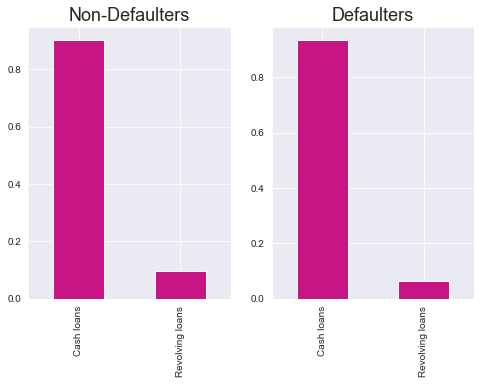

In [197]:
fig, axarr = plt.subplots(1, 2, figsize=(8,5))
target_0.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.bar(ax=axarr[0], color='mediumvioletred')
axarr[0].set_title("Non-Defaulters", fontsize=18)
target_1.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.bar(ax=axarr[1],color='mediumvioletred')
axarr[1].set_title("Defaulters", fontsize=18)
plt.show()

#### Defaulters take slightly more cash loans and lesser revolving loans than non-defaulters.

## Target And Gender

In [198]:
print("The contract type chosen by non-defaulters are:\n",  target_0.CODE_GENDER.value_counts(normalize=True))
print()
print()
print("The contract type chosen by defaulters are:\n", target_1.CODE_GENDER.value_counts(normalize=True))

The contract type chosen by non-defaulters are:
 F     0.666032
M     0.333954
XNA   0.000014
Name: CODE_GENDER, dtype: float64


The contract type chosen by defaulters are:
 F   0.570796
M   0.429204
Name: CODE_GENDER, dtype: float64


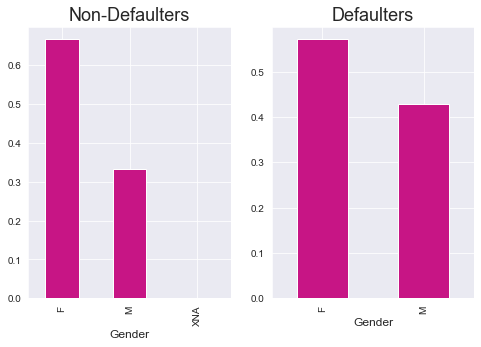

In [199]:
fig, axarr = plt.subplots(1, 2, figsize=(8,5))
target_0.CODE_GENDER.value_counts(normalize=True).plot.bar(ax=axarr[0], color='mediumvioletred')
axarr[0].set_title("Non-Defaulters", fontsize=18)
axarr[0].set_xlabel('Gender',fontsize=12)
target_1.CODE_GENDER.value_counts(normalize=True).plot.bar(ax=axarr[1],color='mediumvioletred')
axarr[1].set_title("Defaulters", fontsize=18)
axarr[1].set_xlabel('Gender',fontsize=12)
plt.show()

#### 1) We can find higher proportion of males as defaulters when compared to non-defaulters 
#### 2) Females are more likely to default than males

## Target and Age

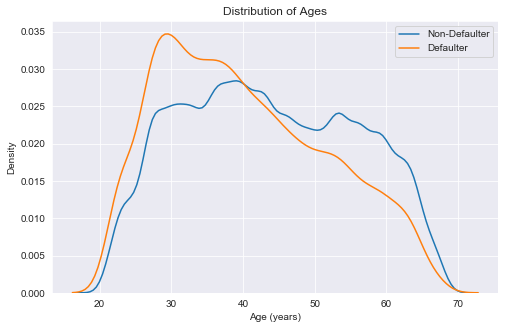

In [200]:
plt.figure(figsize = (8, 5))

# KDE plot of loans that were repaid on time
sns.kdeplot(target_0.Age, label = 'Non-Defaulter')

# KDE plot of loans which were not repaid on time
sns.kdeplot(target_1.Age, label = 'Defaulter')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');
plt.show()

#### The defaulter curve skews towards the younger end of the range. Let's also see the trend in age-groups to confirm this

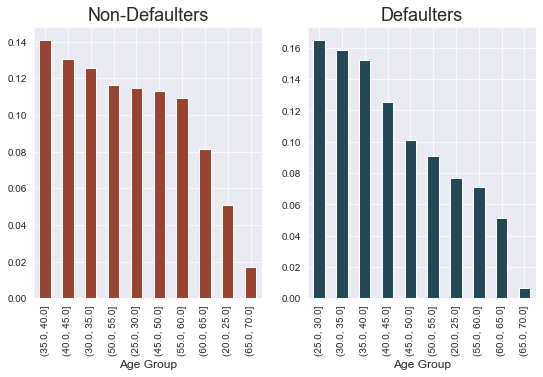

In [201]:
fig, axarr = plt.subplots(1, 2, figsize=(9,5))
target_0.Age_Group.value_counts(normalize=True).plot.bar(ax=axarr[0], color='#994433')
axarr[0].set_title("Non-Defaulters", fontsize=18)
axarr[0].set_xlabel('Age Group',fontsize=12)
target_1.Age_Group.value_counts(normalize=True).plot.bar(ax=axarr[1],color='#224955')
axarr[1].set_title("Defaulters", fontsize=18)
axarr[1].set_xlabel('Age Group',fontsize=12)

plt.show()

#### We can clearly see that younger age groups have difficulty paying the loans with 25-30 age group highest in that of defaulters

## Target and Income Total

In [202]:
print("The contract type chosen by non-defaulters are:\n",  target_0.Income_Total.value_counts(normalize=True))
print()
print()
print("The contract type chosen by defaulters are:\n", target_1.Income_Total.value_counts(normalize=True))

The contract type chosen by non-defaulters are:
 High        0.411807
Medium      0.291256
Low         0.206752
Very high   0.090185
Name: Income_Total, dtype: float64


The contract type chosen by defaulters are:
 High        0.409990
Medium      0.312387
Low         0.210473
Very high   0.067150
Name: Income_Total, dtype: float64


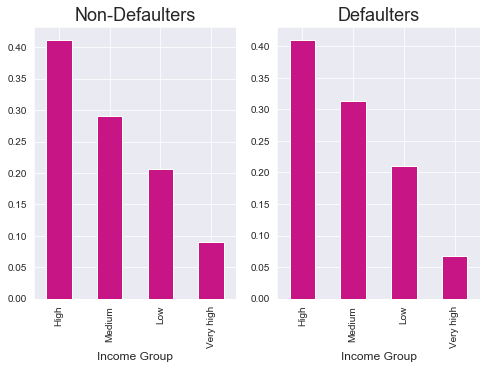

In [203]:
fig, axarr = plt.subplots(1, 2, figsize=(8,5))
target_0.Income_Total.value_counts(normalize=True).plot.bar(ax=axarr[0], color='mediumvioletred')
axarr[0].set_title("Non-Defaulters", fontsize=18)
axarr[0].set_xlabel('Income Group',fontsize=12)
target_1.Income_Total.value_counts(normalize=True).plot.bar(ax=axarr[1],color='mediumvioletred')
axarr[1].set_title("Defaulters", fontsize=18)
axarr[1].set_xlabel('Income Group',fontsize=12)

plt.show()

#### The results are similar to each other so looking at age group alone wouldn't give us much insight.

## Target and Education

In [204]:
print("The contract type chosen by non-defaulters are:\n",  target_0.NAME_EDUCATION_TYPE.value_counts(normalize=True))
print()
print()
print("The contract type chosen by defaulters are:\n", target_1.NAME_EDUCATION_TYPE.value_counts(normalize=True))

The contract type chosen by non-defaulters are:
 Secondary / secondary special   0.703491
Higher education                0.250646
Incomplete higher               0.033270
Lower secondary                 0.012024
Academic degree                 0.000570
Name: NAME_EDUCATION_TYPE, dtype: float64


The contract type chosen by defaulters are:
 Secondary / secondary special   0.786465
Higher education                0.161490
Incomplete higher               0.035126
Lower secondary                 0.016798
Academic degree                 0.000121
Name: NAME_EDUCATION_TYPE, dtype: float64


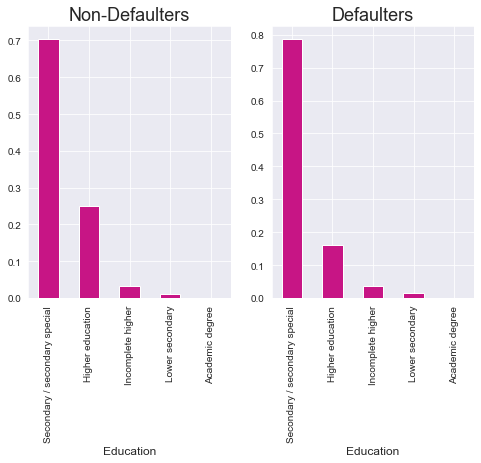

In [205]:
fig, axarr = plt.subplots(1, 2, figsize=(8,5))
target_0.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar(ax=axarr[0], color='mediumvioletred')
axarr[0].set_title("Non-Defaulters", fontsize=18)
axarr[0].set_xlabel('Education',fontsize=12)
target_1.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar(ax=axarr[1],color='mediumvioletred')
axarr[1].set_title("Defaulters", fontsize=18)
axarr[1].set_xlabel('Education',fontsize=12)

plt.show()

#### People with higher education are less likely to default


## Bivariate Analysis

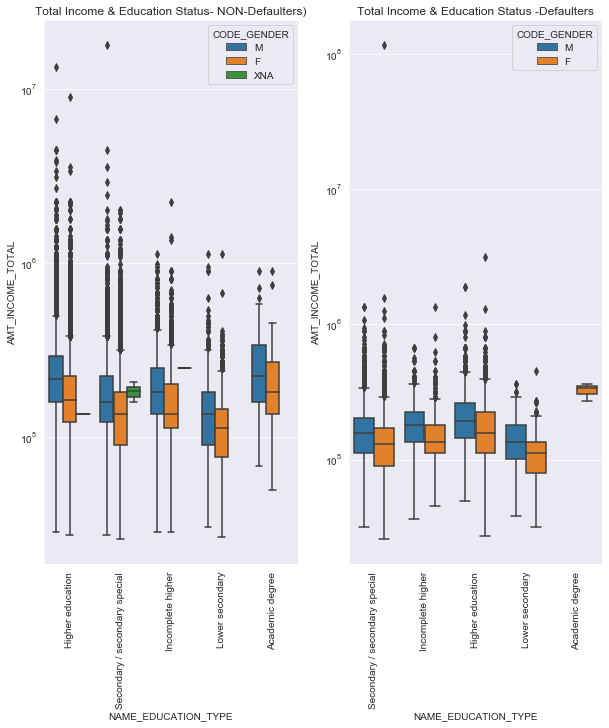

In [206]:

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.yscale('log')
sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='CODE_GENDER',hue_order=['M','F','XNA'],orient='v')
plt.title('Total Income & Education Status- NON-Defaulters)')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.yscale('log')
sns.boxplot(data =target_1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='CODE_GENDER',orient='v')
plt.title('Total Income & Education Status -Defaulters')
plt.xticks(rotation=90)
plt.show()

#### 1) Males have higher income in both the defaulters and non-defaulters when compared to females. Also non-defaulters have higher incomes when compared to defaulters.
#### 2) We see that people in academic degree and higher incomes generally do not have difficulty in paying their loans. In the defaulters group, there are no males and very few females with academic degrees.

In [208]:
target_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,Income_Total,Age,Age_Group,YEARS_EMPLOYED
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,-1188,Core staff,2.000000,1,1,MONDAY,School,-828.000000,High,45,"(40.0, 45.0]",4
2,100004,0,Revolving loans,M,Y,Y,0,67500.000000,135000.000000,6750.000000,135000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-225,Laborers,1.000000,2,2,MONDAY,Government,-815.000000,Low,52,"(50.0, 55.0]",1
3,100006,0,Cash loans,F,N,Y,0,135000.000000,312682.500000,29686.500000,297000.000000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,-3039,Laborers,2.000000,2,2,WEDNESDAY,Business Entity Type 3,-617.000000,Medium,52,"(50.0, 55.0]",9
4,100007,0,Cash loans,M,N,Y,0,121500.000000,513000.000000,21865.500000,513000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-3038,Core staff,1.000000,2,2,THURSDAY,Religion,-1106.000000,Medium,54,"(50.0, 55.0]",9
5,100008,0,Cash loans,M,N,Y,0,99000.000000,490495.500000,27517.500000,454500.000000,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,-1588,Laborers,2.000000,2,2,WEDNESDAY,Other,-2536.000000,Low,46,"(45.0, 50.0]",5


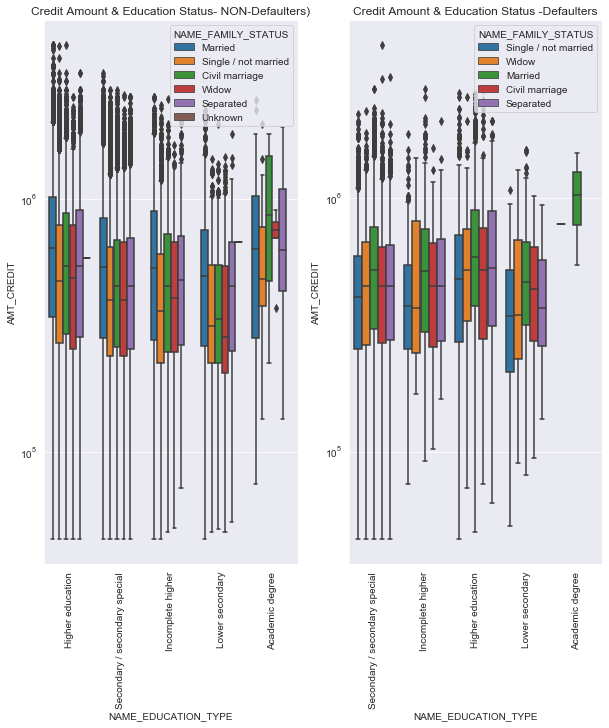

In [209]:

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.yscale('log')
sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount & Education Status- NON-Defaulters)')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.yscale('log')
sns.boxplot(data =target_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount & Education Status -Defaulters')
plt.xticks(rotation=90)
plt.show()

#### 1) In Academic degree: Family status of Single/not married, Civil marriage and separated have higher credits than the other family status.
#### 2) Maximum outliers are witnessed in Single and Civil marriage of higher education 

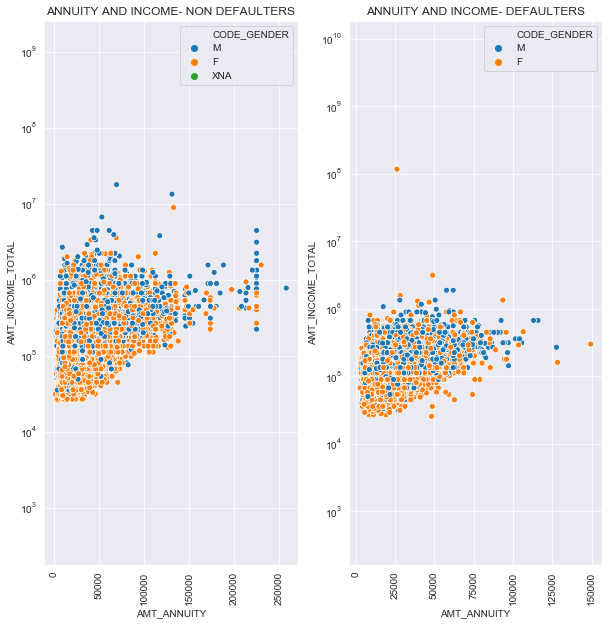

In [210]:

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)

plt.yscale('log')
sns.scatterplot(data =target_0, x='AMT_ANNUITY',y='AMT_INCOME_TOTAL',hue='CODE_GENDER', hue_order=['M','F','XNA'])
plt.title('ANNUITY AND INCOME- NON DEFAULTERS')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.yscale('log')
sns.scatterplot(data =target_1, x='AMT_ANNUITY',y='AMT_INCOME_TOTAL',hue='CODE_GENDER')
plt.title('ANNUITY AND INCOME- DEFAULTERS')
plt.xticks(rotation=90)
plt.show()

#### The non-defaulter group pays higher annuity than the defaulter group. Also, the income of non-defaulter group is higher than that of defaulter group
#### We will see further the correlation between annuity amount and income further in the heatmap. Visually we see that there is a higher correlation between the variables in non-defaulter group.

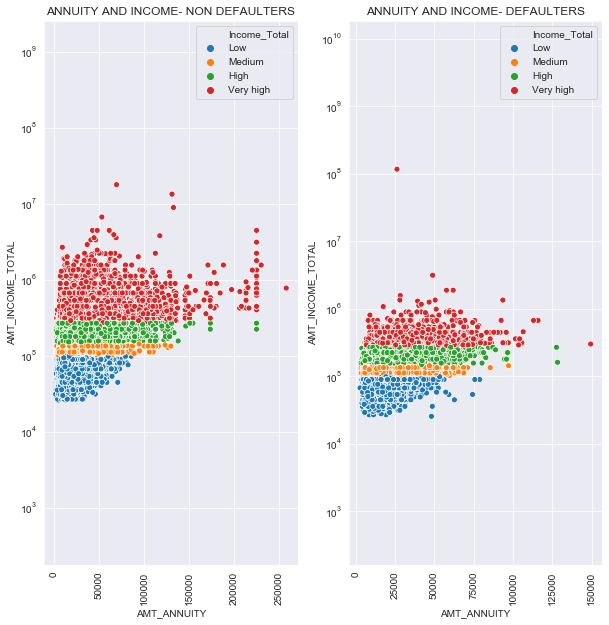

In [211]:

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)

plt.yscale('log')
sns.scatterplot(data =target_0, x='AMT_ANNUITY',y='AMT_INCOME_TOTAL',hue='Income_Total')
plt.title('ANNUITY AND INCOME- NON DEFAULTERS')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.yscale('log')
sns.scatterplot(data =target_1, x='AMT_ANNUITY',y='AMT_INCOME_TOTAL',hue='Income_Total')
plt.title('ANNUITY AND INCOME- DEFAULTERS')
plt.xticks(rotation=90)
plt.show()

#### There are fewer number of people who have very high income in defaulters group and slighly more of lower income group.

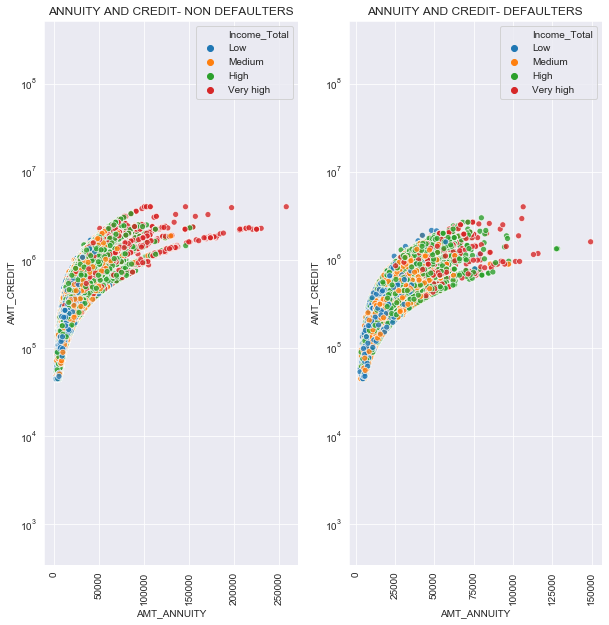

In [212]:

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)

plt.yscale('log')
sns.scatterplot(data =target_0, x='AMT_ANNUITY',y='AMT_CREDIT',hue='Income_Total', alpha=0.8)
plt.title('ANNUITY AND CREDIT- NON DEFAULTERS')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.yscale('log')
sns.scatterplot(data =target_1, x='AMT_ANNUITY',y='AMT_CREDIT',hue='Income_Total', alpha = 0.8)
plt.title('ANNUITY AND CREDIT- DEFAULTERS')
plt.xticks(rotation=90)
plt.show()

#### Fewer people in very high income group category are likely to default.


## CORRELATION

In [213]:
target_1[['AMT_CREDIT', 'AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_GOODS_PRICE','CNT_CHILDREN','Age','YEARS_EMPLOYED']].corr()

,AMT_CREDIT,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,CNT_CHILDREN,Age,YEARS_EMPLOYED
AMT_CREDIT,1.000000,0.752195,0.038131,0.983103,-0.001675,0.135070,0.001938
AMT_ANNUITY,0.752195,1.000000,0.046421,0.752699,0.031257,0.014028,-0.081211
AMT_INCOME_TOTAL,0.038131,0.046421,1.000000,0.037583,0.004796,-0.003154,-0.014978
AMT_GOODS_PRICE,0.983103,0.752699,0.037583,1.000000,-0.008112,0.135603,0.006647
CNT_CHILDREN,-0.001675,0.031257,0.004796,-0.008112,1.000000,-0.259222,-0.192867
Age,0.135070,0.014028,-0.003154,0.135603,-0.259222,1.000000,0.582445
YEARS_EMPLOYED,0.001938,-0.081211,-0.014978,0.006647,-0.192867,0.582445,1.000000


In [214]:
variables = ['AMT_CREDIT', 'AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_GOODS_PRICE','CNT_CHILDREN','Age','YEARS_EMPLOYED']

<Figure size 720x720 with 0 Axes>

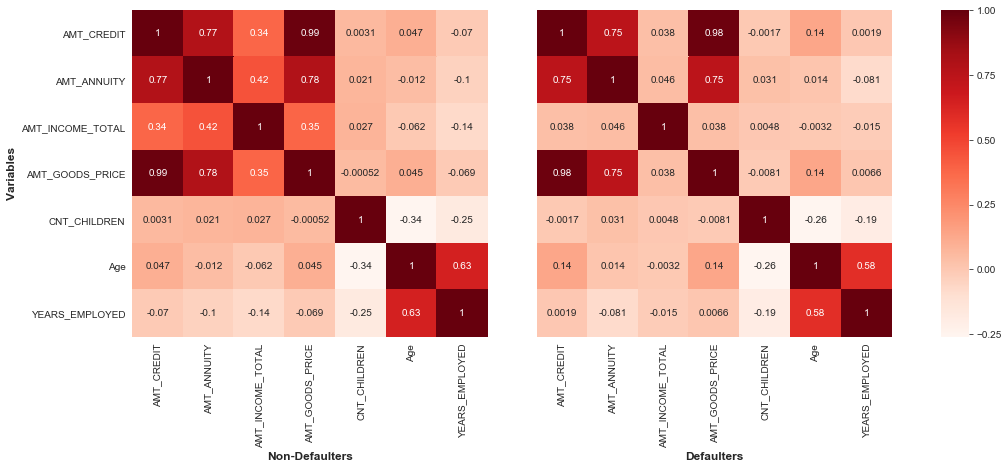

In [215]:
plt.figure(figsize=[10,10])
fig ,(ax1,ax2,axcb) = plt.subplots(1,3, gridspec_kw={'width_ratios':[1,1,0.08]},figsize=[15,6])

ax1.get_shared_y_axes().join(ax1, ax2)


heatmap_0 = sns.heatmap(target_0[variables].corr(),annot=True,
                      cmap='Reds', cbar=False, ax=ax1,)
heatmap_0.set_xlabel('Non-Defaulters', fontdict= {'fontweight':'heavy','fontsize':12})
heatmap_0.set_ylabel('Variables', fontdict= {'fontweight':'heavy','fontsize':12})

heatmap_0.set_ylim(7,0)

heatmap = sns.heatmap(target_1[variables].corr(), 
                      annot=True,cmap='Reds',  cbar_ax=axcb, ax=ax2)
heatmap.set_xlabel('Defaulters', fontdict= {'fontweight':'heavy','fontsize':12})
heatmap.set_ylabel('')
heatmap.set_yticks([])


heatmap.set_ylim(7,0)

for ax in [heatmap_0,heatmap]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=90)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)

plt.show()


#### 1) We see the correlation between annuity amount and total income '0.42' in non-defaulters which means that with the increase of one the other increases as well. Whereas we cannot find any correlation between these two in the defaulters group.

#### 2) Similarly, the correlation between credit amount and total income is higher is '0.34'  in non-defaulters whereas it is 0.038 in non-defaulters group. 

#### 3) The correlation between annuity amount and credit amount is 0.75 in defaulters group. The company can possibly reduce the annuity amount for people who have trouble repaying the loan as defaulters are from a lower income group.

## Previous Application Data

In [216]:
previous = pd.read_csv('previous_application (1).csv')
previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430000,17145.000000,17145.000000,0.000000,17145.000000,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.000000,middle,POS mobile with interest,365243.000000,-42.000000,300.000000,-42.000000,-37.000000,0.000000
1,2802425,108129,Cash loans,25188.615000,607500.000000,679671.000000,nan,607500.000000,THURSDAY,11,Y,1,nan,nan,nan,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.000000,low_action,Cash X-Sell: low,365243.000000,-134.000000,916.000000,365243.000000,365243.000000,1.000000
2,2523466,122040,Cash loans,15060.735000,112500.000000,136444.500000,nan,112500.000000,TUESDAY,11,Y,1,nan,nan,nan,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.000000,high,Cash X-Sell: high,365243.000000,-271.000000,59.000000,365243.000000,365243.000000,1.000000
3,2819243,176158,Cash loans,47041.335000,450000.000000,470790.000000,nan,450000.000000,MONDAY,7,Y,1,nan,nan,nan,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.000000,middle,Cash X-Sell: middle,365243.000000,-482.000000,-152.000000,-182.000000,-177.000000,1.000000
4,1784265,202054,Cash loans,31924.395000,337500.000000,404055.000000,nan,337500.000000,THURSDAY,9,Y,1,nan,nan,nan,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.000000,high,Cash Street: high,nan,nan,nan,nan,nan,nan


In [217]:
null_values_previous = null_values_table(previous)
null_values_previous

The dataframe has 37 columns.
There are 16 columns that have missing values.


,Missing Values,% of Total Values
RATE_INTEREST_PRIMARY,1664263,99.640000
RATE_INTEREST_PRIVILEGED,1664263,99.640000
AMT_DOWN_PAYMENT,895844,53.640000
RATE_DOWN_PAYMENT,895844,53.640000
NAME_TYPE_SUITE,820405,49.120000
DAYS_FIRST_DRAWING,673065,40.300000
DAYS_FIRST_DUE,673065,40.300000
DAYS_LAST_DUE_1ST_VERSION,673065,40.300000
DAYS_LAST_DUE,673065,40.300000
DAYS_TERMINATION,673065,40.300000


In [218]:
drop_cols_1 = list((null_values_previous[(null_values_previous['% of Total Values'].values >= 50) == True]).index)

print('We will be dropping {} columns as they constitute more than 50% of null values'.format(len(drop_cols_1)))

We will be dropping 4 columns as they constitute more than 50% of null values


In [219]:
previous.drop(labels=drop_cols_1, axis =1, inplace = True)

In [220]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,Income_Total,Age,Age_Group,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,351000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-637,Laborers,1.000000,2,2,WEDNESDAY,Business Entity Type 3,-1134.000000,High,25,"(20.0, 25.0]",2
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,-1188,Core staff,2.000000,1,1,MONDAY,School,-828.000000,High,45,"(40.0, 45.0]",4
2,100004,0,Revolving loans,M,Y,Y,0,67500.000000,135000.000000,6750.000000,135000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-225,Laborers,1.000000,2,2,MONDAY,Government,-815.000000,Low,52,"(50.0, 55.0]",1
3,100006,0,Cash loans,F,N,Y,0,135000.000000,312682.500000,29686.500000,297000.000000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,-3039,Laborers,2.000000,2,2,WEDNESDAY,Business Entity Type 3,-617.000000,Medium,52,"(50.0, 55.0]",9
4,100007,0,Cash loans,M,N,Y,0,121500.000000,513000.000000,21865.500000,513000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-3038,Core staff,1.000000,2,2,THURSDAY,Religion,-1106.000000,Medium,54,"(50.0, 55.0]",9


In [221]:
previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430000,17145.000000,17145.000000,17145.000000,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.000000,middle,POS mobile with interest,365243.000000,-42.000000,300.000000,-42.000000,-37.000000,0.000000
1,2802425,108129,Cash loans,25188.615000,607500.000000,679671.000000,607500.000000,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.000000,low_action,Cash X-Sell: low,365243.000000,-134.000000,916.000000,365243.000000,365243.000000,1.000000
2,2523466,122040,Cash loans,15060.735000,112500.000000,136444.500000,112500.000000,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.000000,high,Cash X-Sell: high,365243.000000,-271.000000,59.000000,365243.000000,365243.000000,1.000000
3,2819243,176158,Cash loans,47041.335000,450000.000000,470790.000000,450000.000000,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.000000,middle,Cash X-Sell: middle,365243.000000,-482.000000,-152.000000,-182.000000,-177.000000,1.000000
4,1784265,202054,Cash loans,31924.395000,337500.000000,404055.000000,337500.000000,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.000000,high,Cash Street: high,nan,nan,nan,nan,nan,nan


In [222]:
## Merging the two datasets on the common column

merged_database= pd.merge(app_data, previous, how='inner', on='SK_ID_CURR',suffixes='_x')
merged_database.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,Income_Total,Age,Age_Group,YEARS_EMPLOYED,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_GOODS_PRICEx,WEEKDAY_APPR_PROCESS_STARTx,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEx,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,351000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-637,Laborers,1.000000,2,2,WEDNESDAY,Business Entity Type 3,-1134.000000,High,25,"(20.0, 25.0]",2,1038818,Consumer loans,9251.775000,179055.000000,179055.000000,179055.000000,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.000000,low_normal,POS other with interest,365243.000000,-565.000000,125.000000,-25.000000,-17.000000,0.000000
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,-1188,Core staff,2.000000,1,1,MONDAY,School,-828.000000,High,45,"(40.0, 45.0]",4,1810518,Cash loans,98356.995000,900000.000000,1035882.000000,900000.000000,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.000000,low_normal,Cash X-Sell: low,365243.000000,-716.000000,-386.000000,-536.000000,-527.000000,1.000000
2,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,-1188,Core staff,2.000000,1,1,MONDAY,School,-828.000000,High,45,"(40.0, 45.0]",4,2636178,Consumer loans,64567.665000,337500.000000,348637.500000,337500.000000,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.000000,middle,POS industry with interest,365243.000000,-797.000000,-647.000000,-647.000000,-639.000000,0.000000
3,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,-1188,Core staff,2.000000,1,1,MONDAY,School,-828.000000,High,45,"(40.0, 45.0]",4,2396755,Consumer loans,6737.310000,68809.500000,68053.500000,68809.500000,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.000000,middle,POS household with interest,365243.000000,-2310.000000,-1980.000000,-1980.000000,-1976.000000,1.000000
4,100004,0,Revolving loans,M,Y,Y,0,67500.000000,135000.000000,6750.000000,135000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-225,Laborers,1.000000,2,2,MONDAY,Government,-815.000000,Low,52,"(50.0, 55.0]",1,1564014,Consumer loans,5357.250000,24282.000000,20106.000000,24282.000000,FRIDAY,5,Y,1,XAP,Approved,-815,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.000000,middle,POS mobile without interest,365243.000000,-784.000000,-694.000000,-724.000000,-714.000000,0.000000


#### Manually dropping columns which don't seem too relevant for the analysis

In [223]:
merged_database.drop(['WEEKDAY_APPR_PROCESS_START_','WEEKDAY_APPR_PROCESS_STARTx' ,'HOUR_APPR_PROCESS_START','REGION_RATING_CLIENT',
             'REGION_RATING_CLIENT_W_CITY','FLAG_LAST_APPL_PER_CONTRACT',
             'NFLAG_LAST_APPL_IN_DAY','NAME_TYPE_SUITEx','NAME_CLIENT_TYPE','SELLERPLACE_AREA'
             ],axis=1,inplace=True)


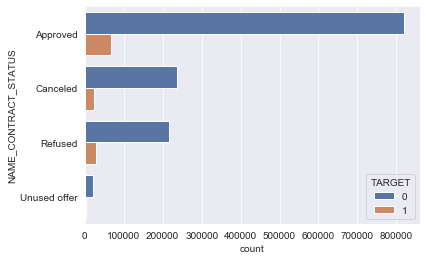

In [224]:
sns.countplot(data = merged_database, y='NAME_CONTRACT_STATUS',
                 order=merged_database['NAME_CONTRACT_STATUS'].value_counts().index,
                 hue = 'TARGET',palette='deep')

#### We can see that the company suffered both a business loss as well as financial loss. The company cancelled the application of people who did not have payment difficulties thus suffering business loss and also they approved contracts for the ones who have trouble paying and therefore suffering financial loss.

In [225]:
merged_database.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,Income_Total,Age,Age_Group,YEARS_EMPLOYED,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_GOODS_PRICEx,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,351000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-637,Laborers,1.000000,Business Entity Type 3,-1134.000000,High,25,"(20.0, 25.0]",2,1038818,Consumer loans,9251.775000,179055.000000,179055.000000,179055.000000,XAP,Approved,-606,XNA,XAP,Vehicles,POS,XNA,Stone,Auto technology,24.000000,low_normal,POS other with interest,365243.000000,-565.000000,125.000000,-25.000000,-17.000000,0.000000
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,-1188,Core staff,2.000000,School,-828.000000,High,45,"(40.0, 45.0]",4,1810518,Cash loans,98356.995000,900000.000000,1035882.000000,900000.000000,XNA,Approved,-746,XNA,XAP,XNA,Cash,x-sell,Credit and cash offices,XNA,12.000000,low_normal,Cash X-Sell: low,365243.000000,-716.000000,-386.000000,-536.000000,-527.000000,1.000000
2,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,-1188,Core staff,2.000000,School,-828.000000,High,45,"(40.0, 45.0]",4,2636178,Consumer loans,64567.665000,337500.000000,348637.500000,337500.000000,XAP,Approved,-828,Cash through the bank,XAP,Furniture,POS,XNA,Stone,Furniture,6.000000,middle,POS industry with interest,365243.000000,-797.000000,-647.000000,-647.000000,-639.000000,0.000000
3,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,-1188,Core staff,2.000000,School,-828.000000,High,45,"(40.0, 45.0]",4,2396755,Consumer loans,6737.310000,68809.500000,68053.500000,68809.500000,XAP,Approved,-2341,Cash through the bank,XAP,Consumer Electronics,POS,XNA,Country-wide,Consumer electronics,12.000000,middle,POS household with interest,365243.000000,-2310.000000,-1980.000000,-1980.000000,-1976.000000,1.000000
4,100004,0,Revolving loans,M,Y,Y,0,67500.000000,135000.000000,6750.000000,135000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-225,Laborers,1.000000,Government,-815.000000,Low,52,"(50.0, 55.0]",1,1564014,Consumer loans,5357.250000,24282.000000,20106.000000,24282.000000,XAP,Approved,-815,Cash through the bank,XAP,Mobile,POS,XNA,Regional / Local,Connectivity,4.000000,middle,POS mobile without interest,365243.000000,-784.000000,-694.000000,-724.000000,-714.000000,0.000000


#### There are a lot of values in the database with XNA, XAP values, we would have to get rid of that data for better analysis

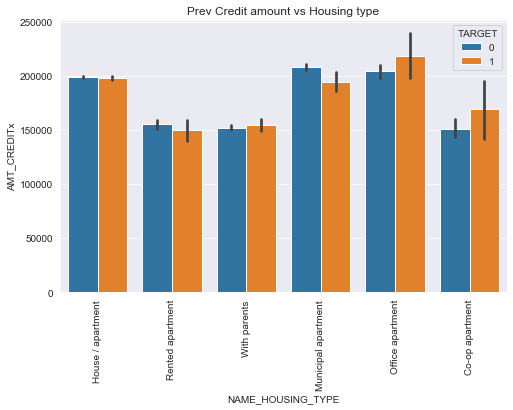

In [226]:

plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
sns.barplot(data =merged_database,x='NAME_HOUSING_TYPE', y='AMT_CREDITx',hue='TARGET')
plt.title('Prev Credit amount vs Housing type')
plt.show()

#### Banks should be more careful about giving loans to people who live in co-op deparments and office deparments as can be seen from the bar graph

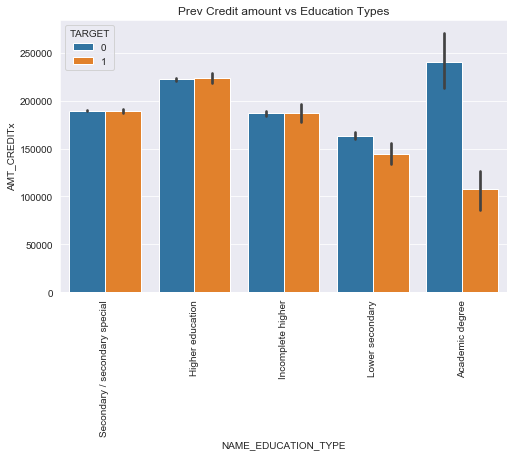

In [227]:

plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
sns.barplot(data =merged_database,x='NAME_EDUCATION_TYPE', y='AMT_CREDITx',hue='TARGET')
plt.title('Prev Credit amount vs Education Types')
plt.show()

#### Banks should focus on people with academic degrees as they are most likely to repay the loans.

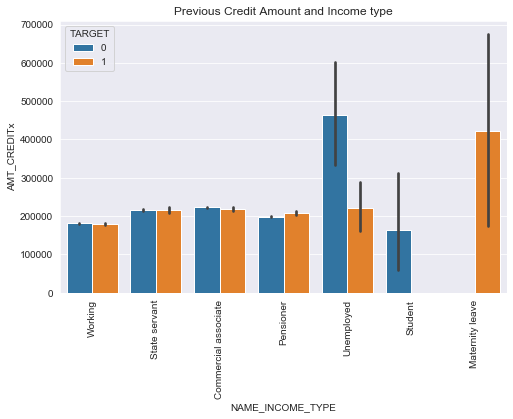

In [228]:

plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
sns.barplot(data =merged_database,x='NAME_INCOME_TYPE', y='AMT_CREDITx',hue='TARGET')
plt.title('Previous Credit Amount and Income type')
plt.show()

#### 1) Women in maternity leave should be avoided by the banks as it is highly likely that they are going to default.
#### 2) Surprisingly, a high proportion of people who are unemployed have been able to pay their loans. We will probably need to investigate it further.

In [229]:
merged_database.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True)*100

XAP                                55.665024
XNA                                40.132319
Repairs                             1.423002
Other                               0.950130
Urgent needs                        0.511848
Buying a used car                   0.174648
Building a house or an annex        0.165806
Everyday expenses                   0.145151
Medicine                            0.132348
Payments on other loans             0.111268
Education                           0.094362
Journey                             0.073707
Purchase of electronic equipment    0.066068
Buying a new car                    0.062672
Wedding / gift / holiday            0.056660
Buying a home                       0.049586
Car repairs                         0.048879
Furniture                           0.046686
Buying a holiday home / land        0.032751
Business development                0.025394
Gasification / water supply         0.017755
Buying a garage                     0.008205
Hobby     

#### We will need to delete XAP and XNA rows for further analysis. We can find that out of the above loan purposes, which ones get approved, and rejected.